In [1]:
import random

# encoding
def generate_random_value(bound = 100):
    return (random.random()*2 - 1)*bound

# compute cost
def compute_cost(individual): # cost
    return sum(val*val for val in individual)

In [2]:
def create_individual():
    return [generate_random_value() for _ in range(n)]

def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
            
    
    return individual1_new, individual2_new

def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

def selection(sorted_old_population):    
    index1 = random.randint(0, m-1) 
    index2 = random.randint(0, m-1)
    
    while index2 == index1:
        index2 = random.randint(0, m-1)
            
    individual_s = sorted_old_population[index1]
    if index2 < index1: # get smaller one (cost)
        individual_s = sorted_old_population[index2]
    
    return individual_s 

In [6]:
n = 6
m = 100
n_generations = 300

losses = []

##### algorithm
# step 1: create initial population
population = [create_individual() for _ in range(m)]

#==== loops
elitism = 2
for i in range(n_generations):
    sorted_population = sorted(population, key=compute_cost)
        
    # for debug
    if i%10 == 0:
        losses.append(compute_cost(sorted_population[0]))
        print("Cost:", compute_cost(sorted_population[0]))
    
    # create new_population (get the first two)
    new_population = sorted_population[:elitism]   
    
    while len(new_population) < m:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        # copy 
        new_population.append(individual_m1)
        new_population.append(individual_m2)

    # update population
    population = new_population

Cost: 5118.239659267984
Cost: 327.66560549294144
Cost: 28.35968484428809
Cost: 28.35968484428809
Cost: 28.35968484428809
Cost: 5.012990598450012
Cost: 5.012990598450012
Cost: 3.7930684666504204
Cost: 1.2502276122272495
Cost: 1.2502276122272495
Cost: 1.0823701696545176
Cost: 1.0823701696545176
Cost: 1.0823701696545176
Cost: 0.9598112283223499
Cost: 0.9474866239941393
Cost: 0.9474866239941393
Cost: 0.9474866239941393
Cost: 0.9474866239941393
Cost: 0.9275876423347682
Cost: 0.8248827445560345
Cost: 0.7942125643208291
Cost: 0.7911122430688493
Cost: 0.7911122430688493
Cost: 0.7911122430688493
Cost: 0.17213635569113558
Cost: 0.17213635569113558
Cost: 0.17213635569113558
Cost: 0.17213635569113558
Cost: 0.08064868935897226
Cost: 0.07940380457305114


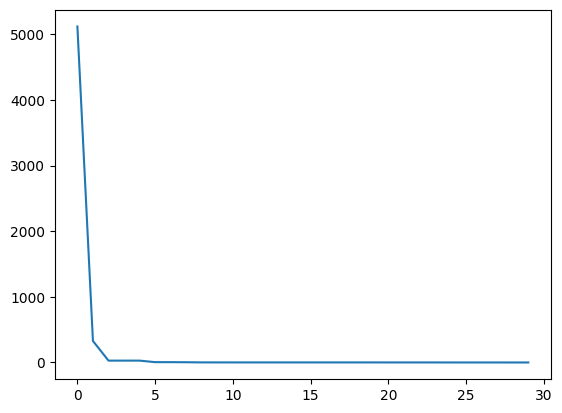

In [7]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

## using fitness

In [5]:
import random

# encoding
def generate_random_value(bound = 20):
    return (random.random()*2 - 1)*bound

# compute fitness
def compute_loss(individual):
    return sum(val*val for val in individual)

def compute_fitness(individual):
    return 1 / (0.0001 + compute_loss(individual))

In [6]:
def create_individual():
    return [generate_random_value() for _ in range(n)]

def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
            
    
    return individual1_new, individual2_new

def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

def selection(sorted_old_population):    
    index1 = random.randint(0, m-1) 
    index2 = random.randint(0, m-1)
    
    while index2 == index1:
        index2 = random.randint(0, m-1)
            
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s 

In [7]:
n = 6
m = 100
n_generations = 300

fitnesses = []

##### algorithm
# step 1: create initial population
population = [create_individual() for _ in range(m)]

#==== loops
elitism = 2
for i in range(n_generations):
    sorted_population = sorted(population, key=compute_fitness)
        
    # for debug
    if i%10 == 0:
        fitnesses.append(compute_fitness(sorted_population[-1]))
        print("loss:", compute_loss(sorted_population[-1]))
    
    # create new_population
    new_population = sorted_population[-elitism:]   
    
    while len(new_population) < m:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        # copy 
        new_population.append(individual_m1)
        new_population.append(individual_m2)

    # update population
    population = new_population

loss: 93.73369840945828
loss: 14.66177935231217
loss: 6.005994172873919
loss: 3.2478895275142916
loss: 0.9975054325031186
loss: 0.4485429606613792
loss: 0.09105532109482772
loss: 0.05429452155189533
loss: 0.05429452155189533
loss: 0.024811091857124455
loss: 0.02404094517630989
loss: 0.02404094517630989
loss: 0.02404094517630989
loss: 0.01927547626660192
loss: 0.01927547626660192
loss: 0.013652534670129893
loss: 0.013652534670129893
loss: 0.0052398675229119495
loss: 0.0052398675229119495
loss: 0.0052398675229119495
loss: 0.0052398675229119495
loss: 0.0052398675229119495
loss: 0.0052398675229119495
loss: 0.0052398675229119495
loss: 0.0052398675229119495
loss: 0.0052398675229119495
loss: 0.0052398675229119495
loss: 0.0052398675229119495
loss: 0.0052398675229119495
loss: 0.0052398675229119495


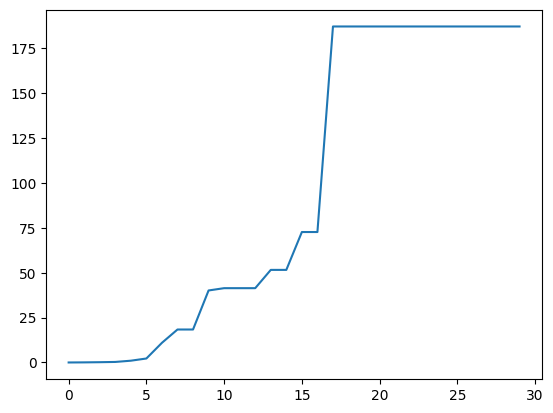

In [8]:
import matplotlib.pyplot as plt

plt.plot(fitnesses)
plt.show()

In [9]:
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])

[0.012325454462582819, -0.003917880375077232, -0.02427882036536655, -0.015935936647695215, -0.013141488353070052, -0.06369055657836853]


In [10]:
print(sorted_population[0])

[16.354016466933817, -0.003917880375077232, -0.02427882036536655, -0.015935936647695215, -0.013141488353070052, -11.054436994049265]
